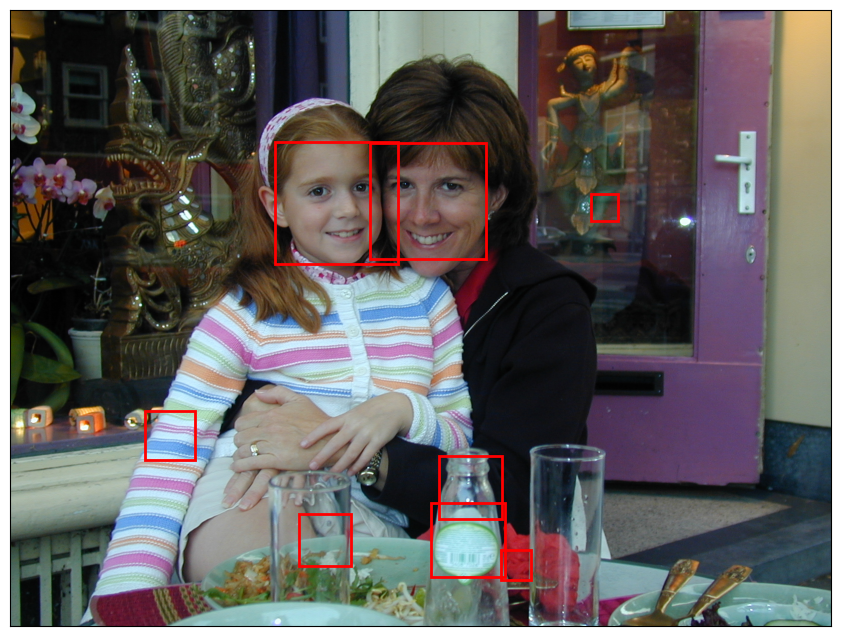

In [15]:
import cv2
from cv2 import CascadeClassifier
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
%matplotlib inline

image = plt.imread('Data/Amsterdam.jpg')
fig, ax = plt.subplots(figsize=(12,8), subplot_kw= {'xticks' : [], 'yticks' : []})
ax.imshow(image)

model = CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = model.detectMultiScale(image)

for face in faces:
    x, y, w, h = face
    rect = Rectangle((x,y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)

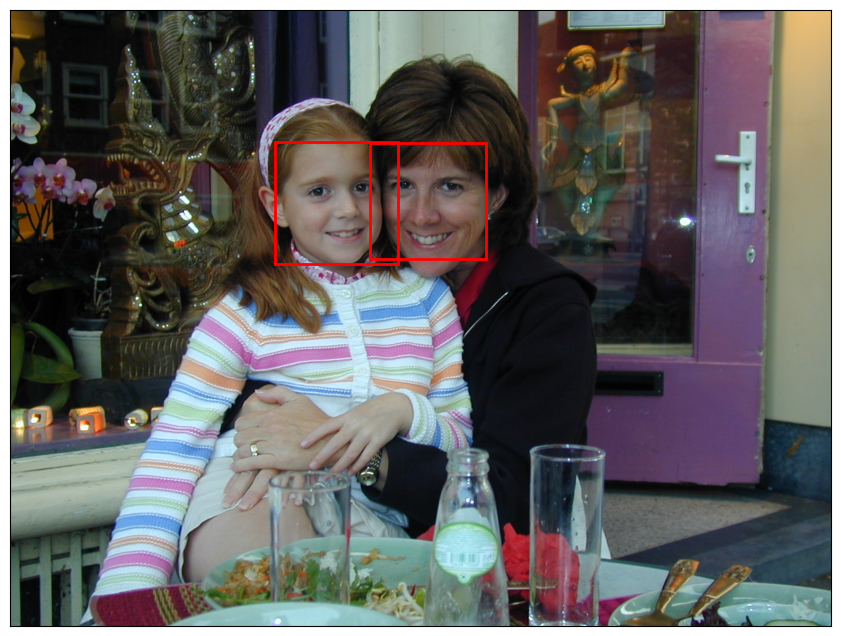

In [16]:
image = plt.imread('Data/Amsterdam.jpg')
fig, ax = plt.subplots(figsize=(12,8), subplot_kw= {'xticks' : [], 'yticks' : []})
ax.imshow(image)

model = CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = model.detectMultiScale(image, minNeighbors=20)

for face in faces:
    x, y, w, h = face
    rect = Rectangle((x,y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)

---
Sử dụng MTCNN - Multitask Casdaded CNN

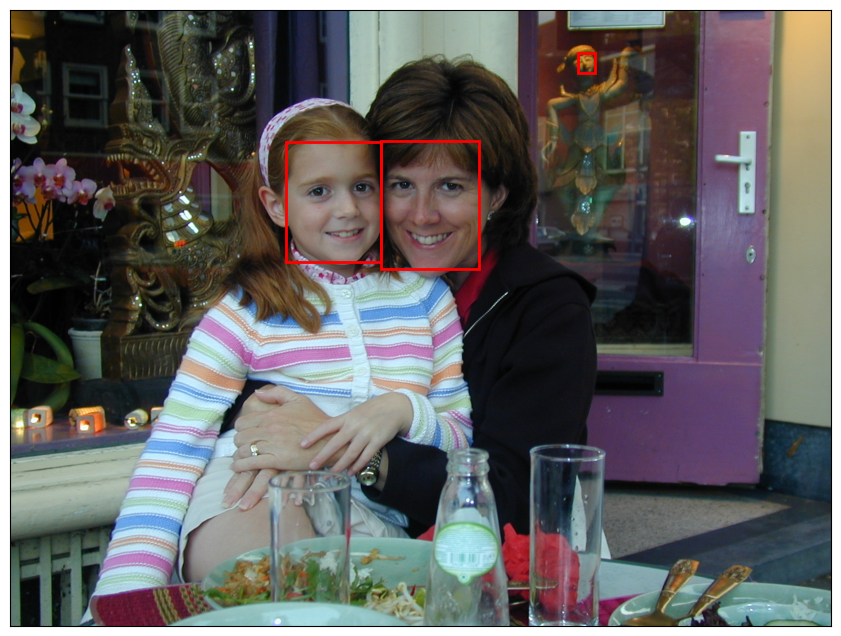

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
%matplotlib inline

image = plt.imread('Data/Amsterdam.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

detector = MTCNN()
faces = detector.detect_faces(image)

for face in faces:
    if face['confidence'] > 0.9:
        x, y, w, h = face['box']
        rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
        ax.add_patch(rect)

---
Trích xuất khuôn mặt từ ảnh

In [18]:
import numpy as np
from PIL import Image, ImageOps
from mtcnn.mtcnn import MTCNN

def extract_faces(input_file, min_confidence=0.9, crop=True):
    # Load the image and orient it correctly
    pil_image = Image.open(input_file)
    exif = pil_image.getexif()
    
    for k in exif.keys():
        if k != 0x0112:
            exif[k] = None
            del exif[k]

    pil_image.info["exif"] = exif.tobytes()
    pil_image = ImageOps.exif_transpose(pil_image)
    image = np.array(pil_image)

    # Find the faces in the image
    detector = MTCNN()
    faces = detector.detect_faces(image)
    faces = [face for face in faces if face['confidence'] >= min_confidence]
    results = []

    for face in faces:
        x1, y1, w, h = face['box']

        if (crop):
            # Compute crop coordinates
            if w > h:
                x1 = x1 + ((w - h) // 2)
                w = h
            elif h > w:
                y1 = y1 + ((h - w) // 2)
                h = w

        # Extract the facial image and add it to the list
        x2 = x1 + w
        y2 = y1 + h
        results.append(Image.fromarray(image[y1:y2, x1:x2]))

    # Return all the facial images
    return results